In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
data = pd.read_csv(r"/Users/loganmorales/Desktop/Comodo_Seckin/netflow_day-02.csv",sep=",",index_col=False, nrows=500)

In [3]:
# data.head(500)

In [4]:
X = data[['srcPackets','dstPackets','srcBytes','dstBytes']]
y = X

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X))

In [6]:
X_normalized.columns = ['srcPackets','dstPackets','srcBytes','dstBytes']

# 3 Cluster Graph

Cluster centers of columns:

   srcPackets  dstPackets  srcBytes  dstBytes
0    0.001345    0.000251  0.002028  0.002510
1    0.999883    0.999991  0.999874  0.999962
2    0.145054    0.057038  0.242214  0.107437


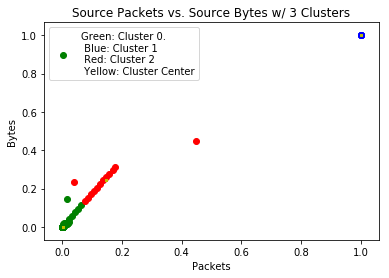

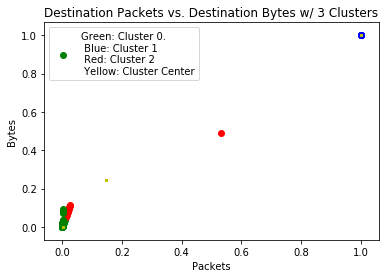

In [7]:
# ---- SOURCE PACKETS VS SOURCE BYTES ---- #

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_normalized)
y_kmeans = kmeans.predict(X_normalized)


centers = kmeans.cluster_centers_
print('Cluster centers of columns:\n')
print(pd.DataFrame(centers,columns= ['srcPackets','dstPackets','srcBytes','dstBytes']))

# Creating new Dataframe with Cluster IDs
labels = kmeans.labels_
df = X_normalized
df["centroid"] = labels

dfOne = df[["srcPackets", "srcBytes", "centroid"]]

np.set_printoptions(suppress=True)
x = dfOne['srcPackets'].values
y = dfOne['srcBytes'].values
z = dfOne['centroid'].values



# Stacking x (srcPackets), y (srcBytes), and z (centroid)
z=np.vstack((x,y,z))

j=0
for i in z[2, :]:
    if i == 2:
        plt.scatter(z[0,:][j], z[1,:][j], c="r")
        plt.scatter(centers[2][0], centers[2][2], c="y", marker="s", s = 5)
    elif i == 1:
        plt.scatter(z[0,:][j], z[1,:][j], c="b")
        plt.scatter(centers[1][0], centers[1][2], c="y", marker="s", s = 5)
    elif i == 0:
        plt.scatter(z[0,:][j], z[1,:][j], c="g")
        plt.scatter(centers[0][0], centers[0][2], c="y", marker="s", s = 5)
    j = j+1
        
plt.legend(["Green: Cluster 0. \n Blue: Cluster 1 \n Red: Cluster 2 \n Yellow: Cluster Center"])
plt.xlabel('Packets')
plt.ylabel('Bytes')
plt.title("Source Packets vs. Source Bytes w/ 3 Clusters")
plt.show()

# ---- DESTINATION PACKETS VS DESTINATION BYTES ---- #
dfOne = df[["dstPackets", "dstBytes", "centroid"]]

np.set_printoptions(suppress=True)
x = dfOne['dstPackets'].values
y = dfOne['dstBytes'].values
z = dfOne['centroid'].values



# Stacking x (dstPackets), y (dstBytes), and z (centroid)
z=np.vstack((x,y,z))

j=0
for i in z[2, :]:
    if i == 2:
        plt.scatter(z[0,:][j], z[1,:][j], c="r")
        plt.scatter(centers[2][1], centers[2][3], c="y", marker="s", s = 5)
    elif i == 1:
        plt.scatter(z[0,:][j], z[1,:][j], c="b")
        plt.scatter(centers[1][1], centers[1][3], c="y", marker="s", s = 5)
    elif i == 0:
        plt.scatter(z[0,:][j], z[1,:][j], c="g")
        plt.scatter(centers[0][1], centers[0][3], c="y", marker="s", s = 5)
    j = j+1
        
plt.legend(["Green: Cluster 0. \n Blue: Cluster 1 \n Red: Cluster 2 \n Yellow: Cluster Center"])
plt.xlabel('Packets')
plt.ylabel('Bytes')
plt.title("Destination Packets vs. Destination Bytes w/ 3 Clusters")
plt.show()


# 2 Cluster Graph

Cluster centers of columns:

   srcPackets  dstPackets  srcBytes  dstBytes
0    0.005119    0.001743  0.008336  0.005265
1    0.999883    0.999991  0.999874  0.999962


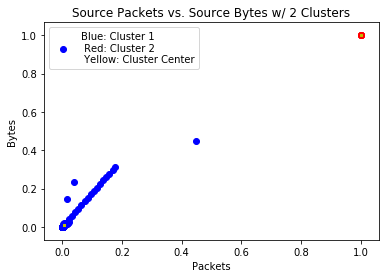

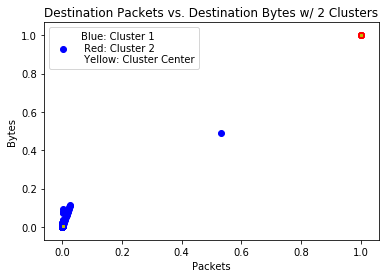

In [7]:
# ---- SOURCE PACKETS VS SOURCE BYTES ---- #

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_normalized)
y_kmeans = kmeans.predict(X_normalized)


centers = kmeans.cluster_centers_
print('Cluster centers of columns:\n')
print(pd.DataFrame(centers,columns= ['srcPackets','dstPackets','srcBytes','dstBytes']))


# Creating new Dataframe with Cluster IDs
labels = kmeans.labels_
df = X_normalized
df["centroid"] = labels


dfOne = df[["srcPackets", "srcBytes", "centroid"]]

np.set_printoptions(suppress=True)
x = dfOne['srcPackets'].values
y = dfOne['srcBytes'].values
z = dfOne['centroid'].values



# Stacking x (srcPackets), y (srcBytes), and z (centroid)
z=np.vstack((x,y,z))

j=0
for i in z[2, :]:
    if i == 1:
        plt.scatter(z[0,:][j], z[1,:][j], c="r")
        plt.scatter(centers[1][0], centers[1][2], c="y", marker="s", s = 5)
    elif i == 0:
        plt.scatter(z[0,:][j], z[1,:][j], c="b")
        plt.scatter(centers[0][0], centers[0][2], c="y", marker="s", s = 5)
    j = j+1
        
plt.legend(["Blue: Cluster 1 \n Red: Cluster 2 \n Yellow: Cluster Center"])
plt.xlabel('Packets')
plt.ylabel('Bytes')
plt.title("Source Packets vs. Source Bytes w/ 2 Clusters")
plt.show()

# ---- DESTINATION PACKETS VS DESTINATION BYTES ---- #
dfOne = df[["dstPackets", "dstBytes", "centroid"]]

np.set_printoptions(suppress=True)
x = dfOne['dstPackets'].values
y = dfOne['dstBytes'].values
z = dfOne['centroid'].values



# Stacking x (dstPackets), y (dstBytes), and z (centroid)
z=np.vstack((x,y,z))

j=0
for i in z[2, :]:
    if i == 1:
        plt.scatter(z[0,:][j], z[1,:][j], c="r")
        plt.scatter(centers[1][1], centers[1][3], c="y", marker="s", s = 5)
    elif i == 0:
        plt.scatter(z[0,:][j], z[1,:][j], c="b")
        plt.scatter(centers[0][1], centers[0][3], c="y", marker="s", s = 5)
    j = j+1
        
plt.legend(["Blue: Cluster 1 \n Red: Cluster 2 \n Yellow: Cluster Center"])
plt.xlabel('Packets')
plt.ylabel('Bytes')
plt.title("Destination Packets vs. Destination Bytes w/ 2 Clusters")
plt.show()

# Implementing Elbow Method

In [10]:
from sklearn import metrics
from scipy.spatial.distance import cdist

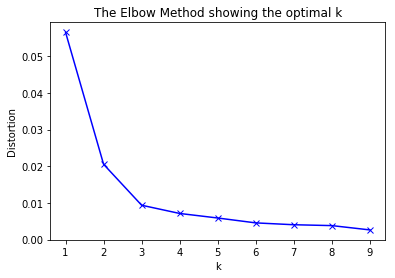

In [11]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_normalized)
    kmeanModel.fit(X_normalized)
    distortions.append(sum(np.min(cdist(X_normalized, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_normalized.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Average Silhouette Method

In [12]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [13]:
cluster_range = range( 2, 10 )

for n_clusters in cluster_range:
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict( X_normalized )

  silhouette_avg = silhouette_score(X_normalized, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(X_normalized, cluster_labels)

For n_clusters = 2 The average silhouette_score is : 0.9854495827150986
For n_clusters = 3 The average silhouette_score is : 0.9583904358847489
For n_clusters = 4 The average silhouette_score is : 0.9569079168895182
For n_clusters = 5 The average silhouette_score is : 0.9454365395744844
For n_clusters = 6 The average silhouette_score is : 0.9237159391862906
For n_clusters = 7 The average silhouette_score is : 0.9269644731945211
For n_clusters = 8 The average silhouette_score is : 0.9275914801782458
For n_clusters = 9 The average silhouette_score is : 0.8802480609333997


# Mean-Shift Clustering

In [14]:
from sklearn.cluster import MeanShift, estimate_bandwidth

ms = MeanShift(bin_seeding=True)
ms.fit(X_normalized)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 12


# Gaussian Mixture Models

In [15]:
from sklearn.cluster import MeanShift, estimate_bandwidth

ms = MeanShift(bin_seeding=True)
ms.fit(X_normalized)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 12


# New column

In [16]:
dataCopy = data

In [17]:
labels = kmeans.labels_
dataCopy['clusters'] = labels
X2 = ['srcPackets','dstPackets','srcBytes','dstBytes', 'clusters']

In [18]:
dataCopy.head()

time  duration   srcDevice   dstDevice  protocol    srcPort    dstPort  \
0  118781      5580  Comp364445  Comp547245        17  Port05507  Port46272   
1  118783      6976  Comp450942  Comp829338         6  Port03137        445   
2  118785     14178    IP564116  Comp141988        17       5060       5060   
3  118785     28147    IP564116  Comp141988        17       5060       5060   
4  118785     48507    IP564116  Comp141988        17       5060       5060   

   srcPackets  dstPackets  srcBytes    dstBytes  clusters  
0           0      755065         0  1042329018         0  
1        1665        1108    300810      250408         0  
2        1866           0   1477041           0         0  
3        3326           0   2656305           0         0  
4        5423           0   4388449           0         0

In [19]:
dataCopy.ix[310]

time               119169
duration            14275
srcDevice      Comp004479
dstDevice      Comp274690
protocol                6
srcPort         Port17617
dstPort              2049
srcPackets       84515677
dstPackets      588887960
srcBytes       8197543524
dstBytes      22300992620
clusters                2
Name: 310, dtype: object

In [20]:
dataCopy.ix[312]

time               119169
duration            46850
srcDevice      Comp004479
dstDevice      Comp274690
protocol                6
srcPort         Port17617
dstPort              2049
srcPackets      188012056
dstPackets     1106026322
srcBytes      18243509496
dstBytes      45576786992
clusters                1
Name: 312, dtype: object

In [21]:
print (dataCopy[X2].groupby(['clusters']).mean())

            srcPackets    dstPackets      srcBytes      dstBytes
clusters                                                        
0         2.529666e+05  2.777762e+05  3.700115e+07  1.143964e+08
1         1.880244e+08  1.106032e+09  1.824479e+10  4.557780e+10
2         2.727680e+07  6.308605e+07  4.419698e+09  4.896921e+09


In [22]:
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2
 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 